In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2,os
data_path="/content/drive/MyDrive/Colab Notebooks/dataset"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [ ]:
import numpy as np

data=np.array(data)/255.0                  
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
data[0].shape

(100, 100, 1)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 20s 2s/step - loss: 0.7452 - accuracy: 0.4762 - val_loss: 0.6926 - val_accuracy: 0.6032
Epoch 2/20
8/8 [==============================] - 18s 2s/step - loss: 0.6933 - accuracy: 0.5238 - val_loss: 0.7336 - val_accuracy: 0.4127
Epoch 3/20
8/8 [==============================] - 19s 2s/step - loss: 0.6872 - accuracy: 0.5556 - val_loss: 0.6630 - val_accuracy: 0.5873
Epoch 4/20
8/8 [==============================] - 19s 2s/step - loss: 0.6741 - accuracy: 0.5794 - val_loss: 0.6196 - val_accuracy: 0.7778
Epoch 5/20
8/8 [==============================] - 20s 2s/step - loss: 0.5616 - accuracy: 0.7183 - val_loss: 0.5156 - val_accuracy: 0.7460
Epoch 6/20
8/8 [==============================] - 18s 2s/step - loss: 0.4978 - accuracy: 0.7579 - val_loss: 0.6809 - val_accuracy: 0.6667
Epoch 7/20
8/8 [==============================] - 20s 2s/step - loss: 0.4292 - accuracy: 0.8016 - val_loss: 0.4232 - val_accuracy: 0.8254
Epoch 8/20
8/8 [==================

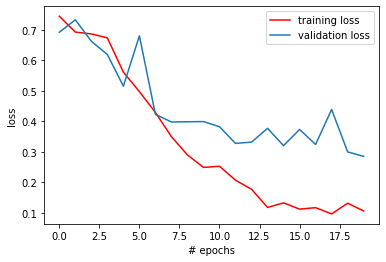

In [ ]:
#Original epochs were 20
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

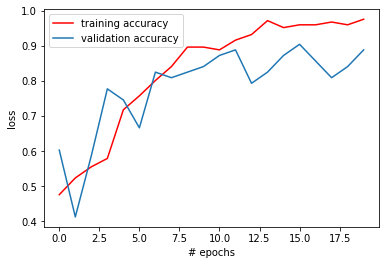

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Testing accuracy
print(model.evaluate(test_data,test_target))

2/2 [==============================] - 1s 62ms/step - loss: 0.6342 - accuracy: 0.7714
[0.634242057800293, 0.7714285850524902]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# training
print(classification_report(train_target,model.predict(train_data).round()))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       157
           1       0.99      0.92      0.96       158

   micro avg       0.96      0.96      0.96       315
   macro avg       0.96      0.96      0.96       315
weighted avg       0.96      0.96      0.96       315
 samples avg       0.96      0.96      0.96       315



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#For testing data
print(classification_report(test_target,model.predict(test_data).round()))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.81      0.72      0.76        18

   micro avg       0.77      0.77      0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35
 samples avg       0.77      0.77      0.77        35



In [ ]:
# Testing

In [ ]:
pip install cv

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
frame = cv2.imread("/content/2.jpg")

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)    
frame=cv2.resize(gray,(img_size,img_size))

In [ ]:
# final_image = cv2.resize(frame, (100,100))
final_image = np.expand_dims(frame,axis = 0)
final_image = final_image/225.0

In [ ]:
frame.shape

(100, 100)

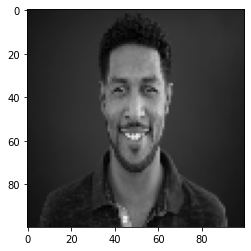

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# Predictions = model.predict(final_image)
# Predictions

In [ ]:
predictions = np.squeeze(model.predict(final_image) >= 0.5).astype(np.int)
predictions

array([1, 0])

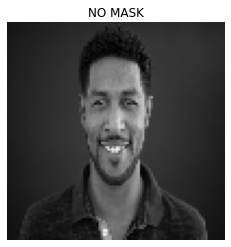

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(("NO MASK" if predictions[0] == 1 else "MASK"))
plt.show()